# 04 Supervised Learning

**Objective:**  
- Load the selected features dataset.  
- Split into train/test sets.  
- Train multiple supervised learning models:  
  - Logistic Regression  
  - Decision Tree  
  - Random Forest  
  - Support Vector Machine (SVM)  
  - K-Nearest Neighbors (KNN)  
- Evaluate models using accuracy, precision, recall, F1-score.  
- Save evaluation metrics for comparison.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [3]:
# Load the dataset with selected features
df = pd.read_csv("../data/heart_disease_selected.csv")

print("✅ Dataset loaded")
print(df.shape)
df.head()


✅ Dataset loaded
(299, 11)


,trestbps,thalch,oldpeak,ca,sex_Male_True,cp_non-anginal_True,cp_typical angina_True,exang_True_True,slope_flat_True,thal_reversable defect_True,target
0,0.749760,0.029124,1.069475,-0.718306,0.687682,-0.619886,3.464102,-0.703562,-0.932068,-0.801784,0
1,1.596354,-1.790447,0.380309,2.487269,0.687682,-0.619886,-0.288675,1.421338,1.072884,-0.801784,1
2,-0.661231,-0.880662,1.327912,1.418744,0.687682,-0.619886,-0.288675,1.421338,1.072884,1.247219,1
3,-0.096835,1.632079,2.103224,-0.718306,0.687682,1.613199,-0.288675,-0.703562,-0.932068,-0.801784,0
4,-0.096835,0.982232,0.294163,-0.718306,-1.454161,-0.619886,-0.288675,-0.703562,-0.932068,-0.801784,0


In [4]:
# Split into features and target
X = df.drop(columns=["target"])
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (239, 10)
Test set: (60, 10)


In [5]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}


In [6]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.84      0.83      0.83        60


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.78      0.74        32
           1       0.71      0.61      0.65        28

    accuracy                           0.70        60
   macro avg       0.70      0.69      0.69        60
weighted avg       0.70      0.70      0.70        60


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.83      0.71      0.77        28

    accuracy                           0.80        60
   ma


✅ Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.833333   0.837963  0.833333  0.831825
1        Decision Tree  0.700000   0.700926  0.700000  0.697285
2        Random Forest  0.800000   0.803704  0.800000  0.798190
3                  SVM  0.850000   0.868376  0.850000  0.846680
4                  KNN  0.833333   0.856667  0.833333  0.828704


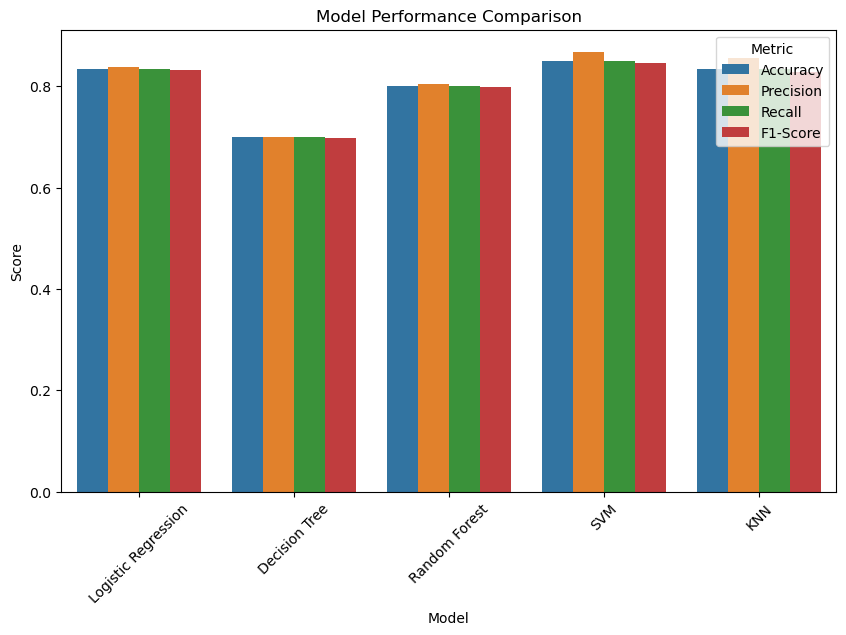

In [8]:
results_df = pd.DataFrame(results)
print("\n✅ Model Comparison Table:")
print(results_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Save results to text file
results_df.to_csv("../results/evaluation_metrics.csv", index=False)

with open("../results/evaluation_metrics.txt", "w") as f:
    f.write(results_df.to_string(index=False))

print("✅ Evaluation metrics saved in ../results/")


✅ Evaluation metrics saved in ../results/
